# Нейронные сети



In [1]:
import tensorflow as tf
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Сначала обучим обычную полносвязную нейронную сеть. 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in range(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(np.reshape(images[j-1], (28, 28)), cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()


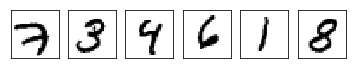

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [4]:
plot_images_separately(mnist.train.images)
print(mnist.train.labels[0:6])

Единицы соответствуют индексу класса

### Однослойная нейронная сеть

Построим модель в tensorflow. Tensorflow - это графический фраемворк, предназначенный в первую очередь для работы с нейронными сетями. На самом деле Вы можете создавать здесь любые алгоритмы машинного обучения. Основная идея работы с tensorflow - вы описываете порядок, в котором создаются переменные и выполняются операции, после чего запускаете обсчёт всего графа. 

В примере ниже мы создаем простейщую модель: 
$y = \mbox{softmax}(Wx + b)$



MacOS:
* sudo easy_install pip
* sudo easy_install --upgrade six
* export TF_BINARY_URL=https://storage.googleapis.com/tensorflow/mac/tensorflow-0.9.0-py3-none-any.whl
* sudo pip3 install --upgrade $TF_BINARY_URL

Windows:
* Install docker - https://download.docker.com/win/stable/InstallDocker.msi
* Download container - docker run -it -p 8888:8888 gcr.io/tensorflow/tensorflow


In [5]:
x = tf.placeholder(tf.float32, [None, 784]) 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 10])

Обратите внимание, что в tensorflow существует два вида перменных. 
tf.placeholder - переменные, значения которых подаются из вне. 
tf.Variable - переменные, которые как-то определяются внутри графа и могут зависеть от внешних переменных. Только tf.Variable могут быть обучаемыми переменными. 

In [8]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>"] and loss Tensor("Mean:0", shape=(), dtype=float32).

In [7]:
sess = tf.InteractiveSession()
  # Train
tf.initialize_all_variables().run()
for i in range(5000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    cost, _ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_: batch_ys})
    if (i % 100 == 0):
        print("%d iter, cost %f" % (i, cost))



Instructions for updating:
Use `tf.global_variables_initializer` instead.


NameError: name 'cross_entropy' is not defined

In [8]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

0.9233


### Нейронная сеть с двумя полносвязными слоями

Попробуем добавить промежуточный полносвязный слой. 

In [9]:
x1 = tf.placeholder(tf.float32, [None, 784]) 

W1 = tf.Variable(tf.zeros([784, 100]))
b1 = tf.Variable(tf.zeros([100]))
W2 = tf.Variable(tf.zeros([100, 10]))
b2 = tf.Variable(tf.zeros([10]))

x2 = tf.sigmoid(tf.matmul(x1, W1) + b1)
y = tf.nn.softmax(tf.matmul(x2, W2) + b2)

y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
sess = tf.InteractiveSession()
  # Train
tf.initialize_all_variables().run()
for i in range(5000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    cost, _ = sess.run([cross_entropy, train_step], feed_dict={x1: batch_xs, y_: batch_ys})
    if (i % 100 == 0):
        print("%d iter, cost %f" % (i, cost))


Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f85785be940>>
Traceback (most recent call last):
  File "/home/archy/.local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 522, in __del__
    self.close()
  File "/home/archy/.local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 1262, in close
    self._default_session.__exit__(None, None, None)
  File "/home/archy/anaconda3/lib/python3.5/contextlib.py", line 66, in __exit__
    next(self.gen)
  File "/home/archy/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3536, in get_controller
    % type(default))
AssertionError: Nesting violated for default stack of <class 'weakref'> objects


0 iter, cost 2.302585
100 iter, cost 2.277459
200 iter, cost 2.040760
300 iter, cost 1.841977
400 iter, cost 1.813944
500 iter, cost 1.668663
600 iter, cost 1.421710
700 iter, cost 1.181906
800 iter, cost 0.716482
900 iter, cost 0.782747
1000 iter, cost 0.435634
1100 iter, cost 0.428862
1200 iter, cost 0.456217
1300 iter, cost 0.366845
1400 iter, cost 0.249427
1500 iter, cost 0.361976
1600 iter, cost 0.430709
1700 iter, cost 0.265916
1800 iter, cost 0.260610
1900 iter, cost 0.184914
2000 iter, cost 0.264893
2100 iter, cost 0.292694
2200 iter, cost 0.377455
2300 iter, cost 0.214893
2400 iter, cost 0.153792
2500 iter, cost 0.242292
2600 iter, cost 0.542443
2700 iter, cost 0.348029
2800 iter, cost 0.189372
2900 iter, cost 0.150312
3000 iter, cost 0.235022
3100 iter, cost 0.277755
3200 iter, cost 0.338690
3300 iter, cost 0.187746
3400 iter, cost 0.402864
3500 iter, cost 0.227085
3600 iter, cost 0.344348
3700 iter, cost 0.406425
3800 iter, cost 0.141283
3900 iter, cost 0.210679
4000 iter, c

In [12]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x1: mnist.test.images,
                                      y_: mnist.test.labels}))

0.9224


### Сверточная нейронная сеть

Convolution:
<img src="3.jpg">

Max pooling:
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png">

In [13]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [14]:
x_image = tf.reshape(x, [-1,28,28,1])

# первый слой
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#второй слой
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#полносвязный слой
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [15]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [16]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))